In [97]:
#importing dependencies
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [98]:
#understanding the dataset
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [99]:
#accessing attributes
ds = data.data
for name, index in enumerate(data.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [100]:
#reshaping data
d = ds[:, 12].reshape(-1, 1)

#shape of data
np.shape(ds)


(506, 13)

In [101]:
#target values
target = data.target.reshape(-1, 1)

#shape of target
np.shape(target)

(506, 1)

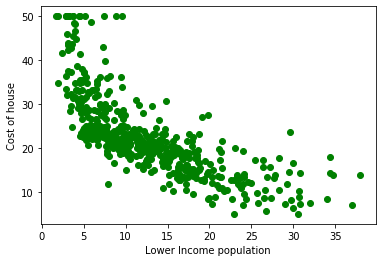

In [102]:
#plotting
plt.scatter(d, target, color='green')
plt.xlabel('Lower Income population')
plt.ylabel('Cost of house')
plt.show()

In [103]:
#regression model
reg = LinearRegression()

#fit the model
reg.fit(d, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
#predicting
pred = reg.predict(d)

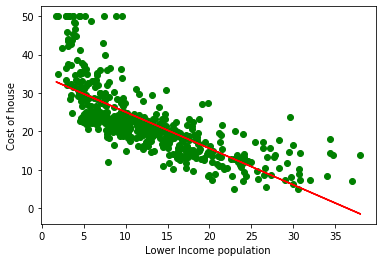

In [105]:
plt.scatter(d, target, color='green')
plt.plot(d, pred, color='red')
plt.xlabel('Lower Income population')
plt.ylabel('Cost of house')
plt.show()

In [106]:
#Resolving the curve 
from sklearn.preprocessing import PolynomialFeatures

#merging of two models using pipeline
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(3), reg)
model.fit(d, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [107]:
pred = model.predict(d)

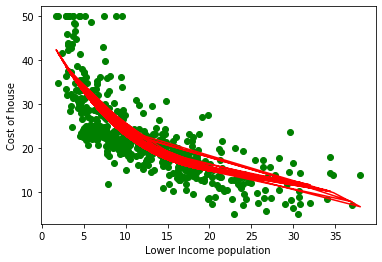

In [108]:
plt.scatter(d, target, color='green')
plt.plot(d, pred, color='red')
plt.xlabel('Lower Income population')
plt.ylabel('Cost of house')
plt.show()

In [109]:
#r_2 metric
from sklearn.metrics import r2_score

#predict
r2_score(pred, target)

0.4798911810272958